In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

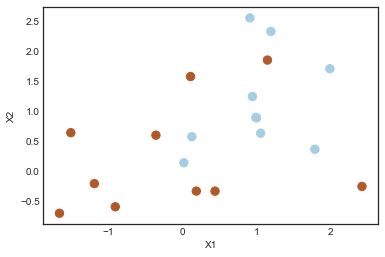

In [3]:

# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

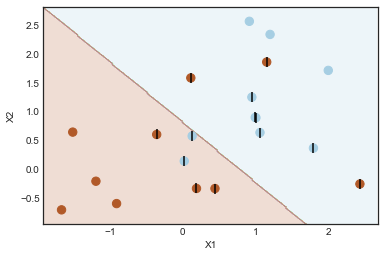

('Number of support vectors: ', 13)


In [4]:
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

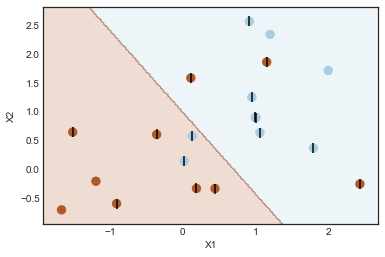

('Number of support vectors: ', 16)


In [5]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [6]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([ 0.00050952,  0.00051026,  0.00025861,  0.00030074,  0.0002975 ,
         0.00030541,  0.00056295]),
 'mean_score_time': array([ 0.0003232 ,  0.00028055,  0.0001955 ,  0.00020897,  0.00018182,
         0.00017905,  0.00025764]),
 'mean_test_score': array([ 0.8 ,  0.8 ,  0.8 ,  0.75,  0.75,  0.75,  0.75]),
 'mean_train_score': array([ 0.79444444,  0.79444444,  0.75      ,  0.77777778,  0.76666667,
         0.76666667,  0.76666667]),
 'param_C': masked_array(data = [0.001 0.01 0.1 1 5 10 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5]),
 'split0_train_score': array([ 0.83333333,  0.83333333,  0.77777778,  0.77777778,  0.77777778,
         0.77777778,  0.77777778]),
 'split1_test

In [7]:
clf.best_params_

{'C': 0.001}

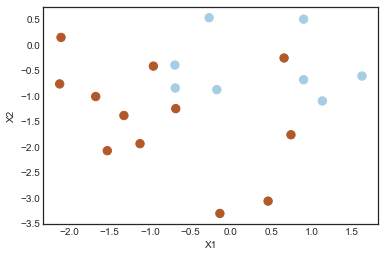

In [8]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [9]:

# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

,-1,1
-1,2,6
1,0,12


In [10]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,2,6
1,0,12


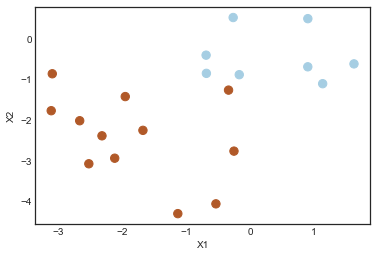

In [11]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [12]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

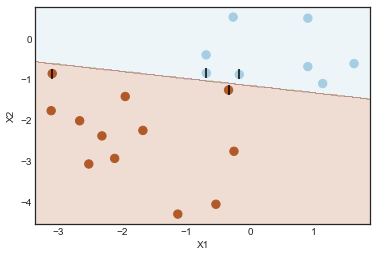

('Number of support vectors: ', 4)


In [13]:
plot_svc(svc4, X_test, y_test)

In [14]:
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

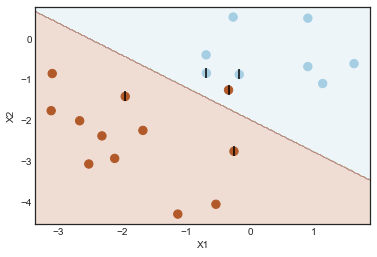

('Number of support vectors: ', 5)


In [15]:
plot_svc(svc5, X_test, y_test)

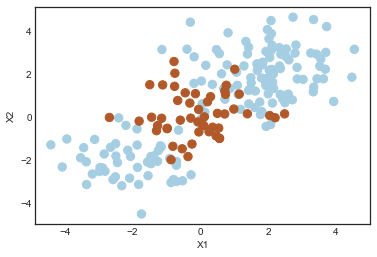

In [16]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [17]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

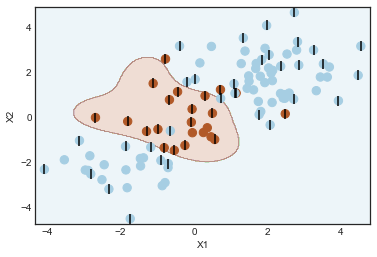

('Number of support vectors: ', 51)


In [18]:
plot_svc(svm, X_train, y_train)

In [19]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

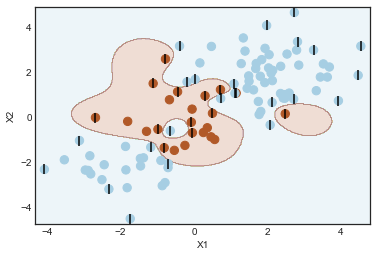

('Number of support vectors: ', 36)


In [20]:
plot_svc(svm2, X_train, y_train)

In [21]:

# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00075336,  0.0005908 ,  0.000454  ,  0.0003958 ,  0.00036523,
         0.0003304 ,  0.00038831,  0.00039008,  0.00042281,  0.00043519,
         0.00032382,  0.0003829 ,  0.00042357,  0.0004514 ,  0.00044081,
         0.00034971,  0.00040331,  0.00058053,  0.00066025,  0.00061326,
         0.00050852,  0.0005609 ,  0.0006258 ,  0.0006654 ,  0.0008604 ]),
 'mean_score_time': array([ 0.00029497,  0.00036576,  0.00021329,  0.00018649,  0.00017247,
         0.00016811,  0.00018899,  0.00017264,  0.00017967,  0.00017588,
         0.00016737,  0.00017493,  0.00017149,  0.00018671,  0.00017219,
         0.00017273,  0.00020113,  0.00022848,  0.00023756,  0.00021122,
         0.00022945,  0.00023036,  0.00022628,  0.00025196,  0.0004112 ]),
 'mean_test_score': array([ 0.77,  0.77,  0.77,  0.77,  0.77,  0.77,  0.77,  0.77,  0.77,
         0.77,  0.92,  0.92,  0.9 ,  0.88,  0.85,  0.92,  0.89,  0.86,
         0.86,  0.87,  0.84,  0.83,  0.86,  0.87,  0.87]),
 'mean_tra

In [22]:
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [23]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[67,  6],
       [ 9, 18]])

In [24]:
clf.best_estimator_.score(X_test, y_test)

0.84999999999999998

In [25]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

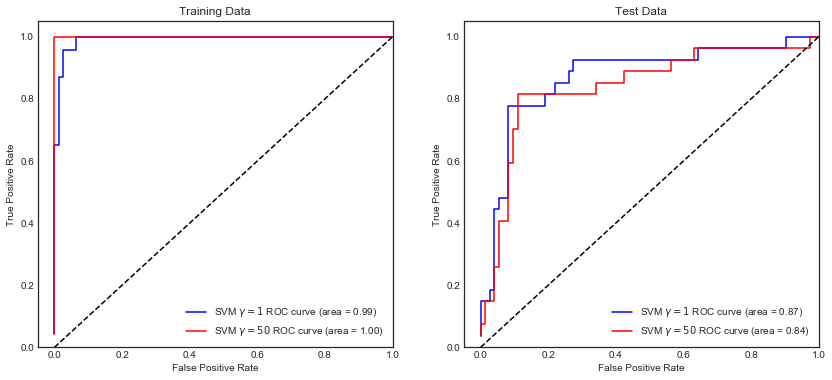

In [27]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

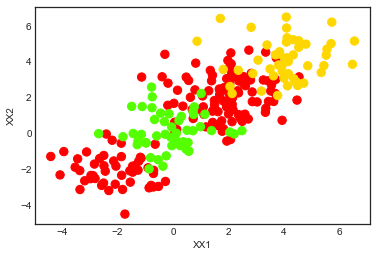

In [28]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [29]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

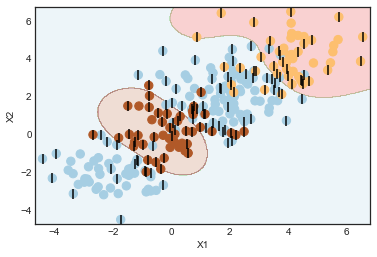

('Number of support vectors: ', 133)


In [30]:
plot_svc(svm5, XX, yy)